In [1]:
import pandas as pd
import numpy as np
import requests
import re
import json
import string 
import syllables
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/remove_links.csv')

In [3]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
def posts_split(posts):
    # split the posts column into 50 separate posts in a list
    posts_split = posts.split('|||')
    
    # split each of the 50 posts into a list of its words/URL links
    # so we have a list of 50 posts and each post is a list of the words/URL links
                
    return posts_split

In [5]:
df['posts_split'] = df['posts'].apply(posts_split)

In [6]:
df

,type,posts,posts_split
0,INFJ,and intj moments sportscenter not top ten pl...,[and intj moments sportscenter not top ten p...
1,ENTP,'I'm finding the lack of me in these posts ver...,['I'm finding the lack of me in these posts ve...
2,INTP,"'Good one _____ course, to which I say I kn...","['Good one _____ course, to which I say I k..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","['Dear INTP, I enjoyed our conversation the ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,"['You're fired., That's another silly misconce..."
...,...,...,...
8670,ISFP,just because I always think of cats as Fi doms...,[just because I always think of cats as Fi dom...
8671,ENFP,'So...if this thread already exists someplace ...,['So...if this thread already exists someplace...
8672,INTP,'So many questions when i do these things. I ...,['So many questions when i do these things. I...
8673,INFP,'I am very conflicted right now when it comes ...,['I am very conflicted right now when it comes...


# 1. Readability of texts
> 206.835 - 1.015(total words/total sentences) -84.6(total syllables/total words)

In [7]:
def sentence_count(X):
    return len(X)

def word_count(X):
    count = 0
    for sentence in X:
        count += len(sentence.split())
    return count

def syll_count(X):
    count_syll = 0
    for sentence in X:
        sentence = sentence.split()
        for word in sentence:
            count_syll +=  syllables.estimate(word)
    return count_syll

In [8]:
df['sentence_count'] = df.posts_split.apply(sentence_count)

In [9]:
df['syll_count'] = df.posts_split.apply(syll_count)

In [10]:
df['word_count'] = df.posts_split.apply(word_count)

In [11]:
df_sum = df.groupby(['type']).sum()
df_sum

,sentence_count,syll_count,word_count
type,,,
ENFJ,8781,366118,252578
ENFP,31192,1269899,879814
ENTJ,10639,431012,291173
ENTP,32195,1259920,855779
ESFJ,1961,81390,56068
ESFP,2054,73796,50952
ESTJ,1819,71830,49630
ESTP,4075,154060,107189
INFJ,67138,2840424,1940618


In [12]:
def readability(X):
    X['readability'] = 206.835 - 1.015*(X['word_count']/X['sentence_count']) -84.6*(X['syll_count']/X['word_count'])
    return X

In [13]:
df_sum = df_sum.apply(lambda x: readability(x), axis=1)
df_sum

,sentence_count,syll_count,word_count,readability
type,,,,
ENFJ,8781.0,366118.0,252578.0,55.009615
ENFP,31192.0,1269899.0,879814.0,56.096223
ENTJ,10639.0,431012.0,291173.0,53.825947
ENTP,32195.0,1259920.0,855779.0,55.302881
ESFJ,1961.0,81390.0,56068.0,55.006680
ESFP,2054.0,73796.0,50952.0,59.126811
ESTJ,1819.0,71830.0,49630.0,56.699081
ESTP,4075.0,154060.0,107189.0,58.542980
INFJ,67138.0,2840424.0,1940618.0,53.670047


<BarContainer object of 16 artists>

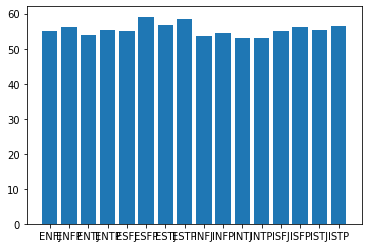

In [14]:
plt.bar(df_sum.index,height = df_sum['readability'])

# Median of word count

In [15]:
df_median = df.groupby(['type']).median()
df_median

,sentence_count,syll_count,word_count
type,,,
ENFJ,49.0,2036.5,1390.0
ENFP,49.0,1946.0,1343.0
ENTJ,49.0,1931.0,1302.0
ENTP,49.0,1907.0,1284.0
ESFJ,50.0,2025.5,1367.5
ESFP,47.5,1701.0,1147.5
ESTJ,50.0,1914.0,1333.0
ESTP,49.0,1813.0,1255.0
INFJ,49.0,2026.0,1379.5


<BarContainer object of 16 artists>

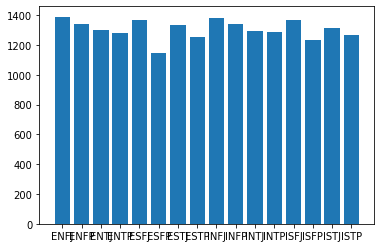

In [16]:
plt.bar(df_median.index,height = df_median['word_count'])

# 2. Average Word per Sentence

In [17]:
df['word_per_sentence'] = df['word_count']/df['sentence_count']

In [18]:
df_avg_word = df.groupby(['type']).mean()
df_avg_word

,sentence_count,syll_count,word_count,word_per_sentence
type,,,,
ENFJ,46.215789,1926.936842,1329.357895,28.691542
ENFP,46.210370,1881.331852,1303.428148,28.220847
ENTJ,46.056277,1865.852814,1260.489177,27.382089
ENTP,47.000000,1839.299270,1249.312409,26.600803
ESFJ,46.690476,1937.857143,1334.952381,28.365306
ESFP,42.791667,1537.416667,1061.500000,24.760177
ESTJ,46.641026,1841.794872,1272.564103,27.334327
ESTP,45.786517,1731.011236,1204.370787,26.160448
INFJ,45.672109,1932.261224,1320.148299,29.130066


<BarContainer object of 16 artists>

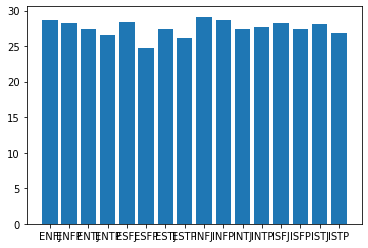

In [19]:
plt.bar(df_avg_word.index, height = df_avg_word['word_per_sentence'])

# 3. Average Word Length

In [20]:
def avg_word_length(posts_split):
    word_length_count = []
    count = 0
    for post in posts_split:
        count += len(post)  
    return count

In [21]:
df['word_length']=df['posts_split'].apply(avg_word_length)

In [22]:
df['avg_word_length'] = df['word_length']/df['word_count']

In [23]:
df.groupby(['type']).mean()

,sentence_count,syll_count,word_count,word_per_sentence,word_length,avg_word_length
type,,,,,,
ENFJ,46.215789,1926.936842,1329.357895,28.691542,7183.152632,5.413038
ENFP,46.210370,1881.331852,1303.428148,28.220847,7023.908148,5.393247
ENTJ,46.056277,1865.852814,1260.489177,27.382089,6908.584416,5.492491
ENTP,47.000000,1839.299270,1249.312409,26.600803,6818.013139,5.457895
ESFJ,46.690476,1937.857143,1334.952381,28.365306,7178.976190,5.377218
ESFP,42.791667,1537.416667,1061.500000,24.760177,5745.500000,5.412372
ESTJ,46.641026,1841.794872,1272.564103,27.334327,6825.794872,5.374882
ESTP,45.786517,1731.011236,1204.370787,26.160448,6467.943820,5.377953
INFJ,45.672109,1932.261224,1320.148299,29.130066,7172.021769,5.439751


# 3. Formality


In [24]:
import spacy

def formality_score(posts):
    nlp = spacy.load("en_core_web_sm")
    pos = ['NOUN','ADF','ADP','PRON','VERB','ADV','INTJ','DET']
    
    sentences = posts
    #print(sentences)
    doc = nlp(sentences)
    pos_ls = []
    for token in doc:
        if token.pos_ in pos:
            pos_ls.append(token.pos_)

    noun_count = 0.0 #NOUN
    adj_count = 0.0 #ADJ
    prep_count = 0.0 # ADP
    article_count = 0.0 #DET
    pron_count = 0.0 #PRON
    verb_count = 0.0 #VERB
    adv_count = 0.0 #ADV
    interj_count = 0.0 #INTJ

    for pos in pos_ls:
        if pos == 'NOUN':
            noun_count += 1
        elif pos == 'ADJ':
            adj_count += 1
        elif pos == 'ADP':
            prep_count += 1
        elif pos == 'PRON':
            pron_count += 1
        elif pos == 'VERB':
            verb_count += 1
        elif pos == 'ADV':
            adv_count += 1
        elif pos == 'INTJ':
            interj_count += 1
        elif pos == 'DET':
            article_count += 1

    noun_freq = noun_count/df['word_count'][0]
    #print(noun_freq)
    adj_freq = adj_count/df['word_count'][0]
    prep_freq = prep_count/df['word_count'][0]
    pron_freq = pron_count/df['word_count'][0]
    verb_freq = verb_count/df['word_count'][0]
    adv_freq = adv_count/df['word_count'][0]
    interj_freq = interj_count/df['word_count'][0]
    article_freq = article_count/df['word_count'][0]

    formality = 0.5*(noun_freq+adj_freq+prep_freq+article_freq)-0.5*(pron_freq+verb_freq+adv_freq+interj_freq)+50
    return formality

In [25]:
df['formality'] = df['posts'].apply(lambda x: formality_score(x))

In [31]:
df_formality = df.groupby(['type']).mean()

In [32]:
df_formality

,sentence_count,syll_count,word_count,word_per_sentence,word_length,avg_word_length,formality
type,,,,,,,
ENFJ,46.215789,1926.936842,1329.357895,28.691542,7183.152632,5.413038,49.951618
ENFP,46.210370,1881.331852,1303.428148,28.220847,7023.908148,5.393247,49.957081
ENTJ,46.056277,1865.852814,1260.489177,27.382089,6908.584416,5.492491,49.993819
ENTP,47.000000,1839.299270,1249.312409,26.600803,6818.013139,5.457895,49.989804
ESFJ,46.690476,1937.857143,1334.952381,28.365306,7178.976190,5.377218,49.959617
ESFP,42.791667,1537.416667,1061.500000,24.760177,5745.500000,5.412372,49.972092
ESTJ,46.641026,1841.794872,1272.564103,27.334327,6825.794872,5.374882,49.967663
ESTP,45.786517,1731.011236,1204.370787,26.160448,6467.943820,5.377953,49.977919
INFJ,45.672109,1932.261224,1320.148299,29.130066,7172.021769,5.439751,49.971875


In [ ]:
plt.dist()